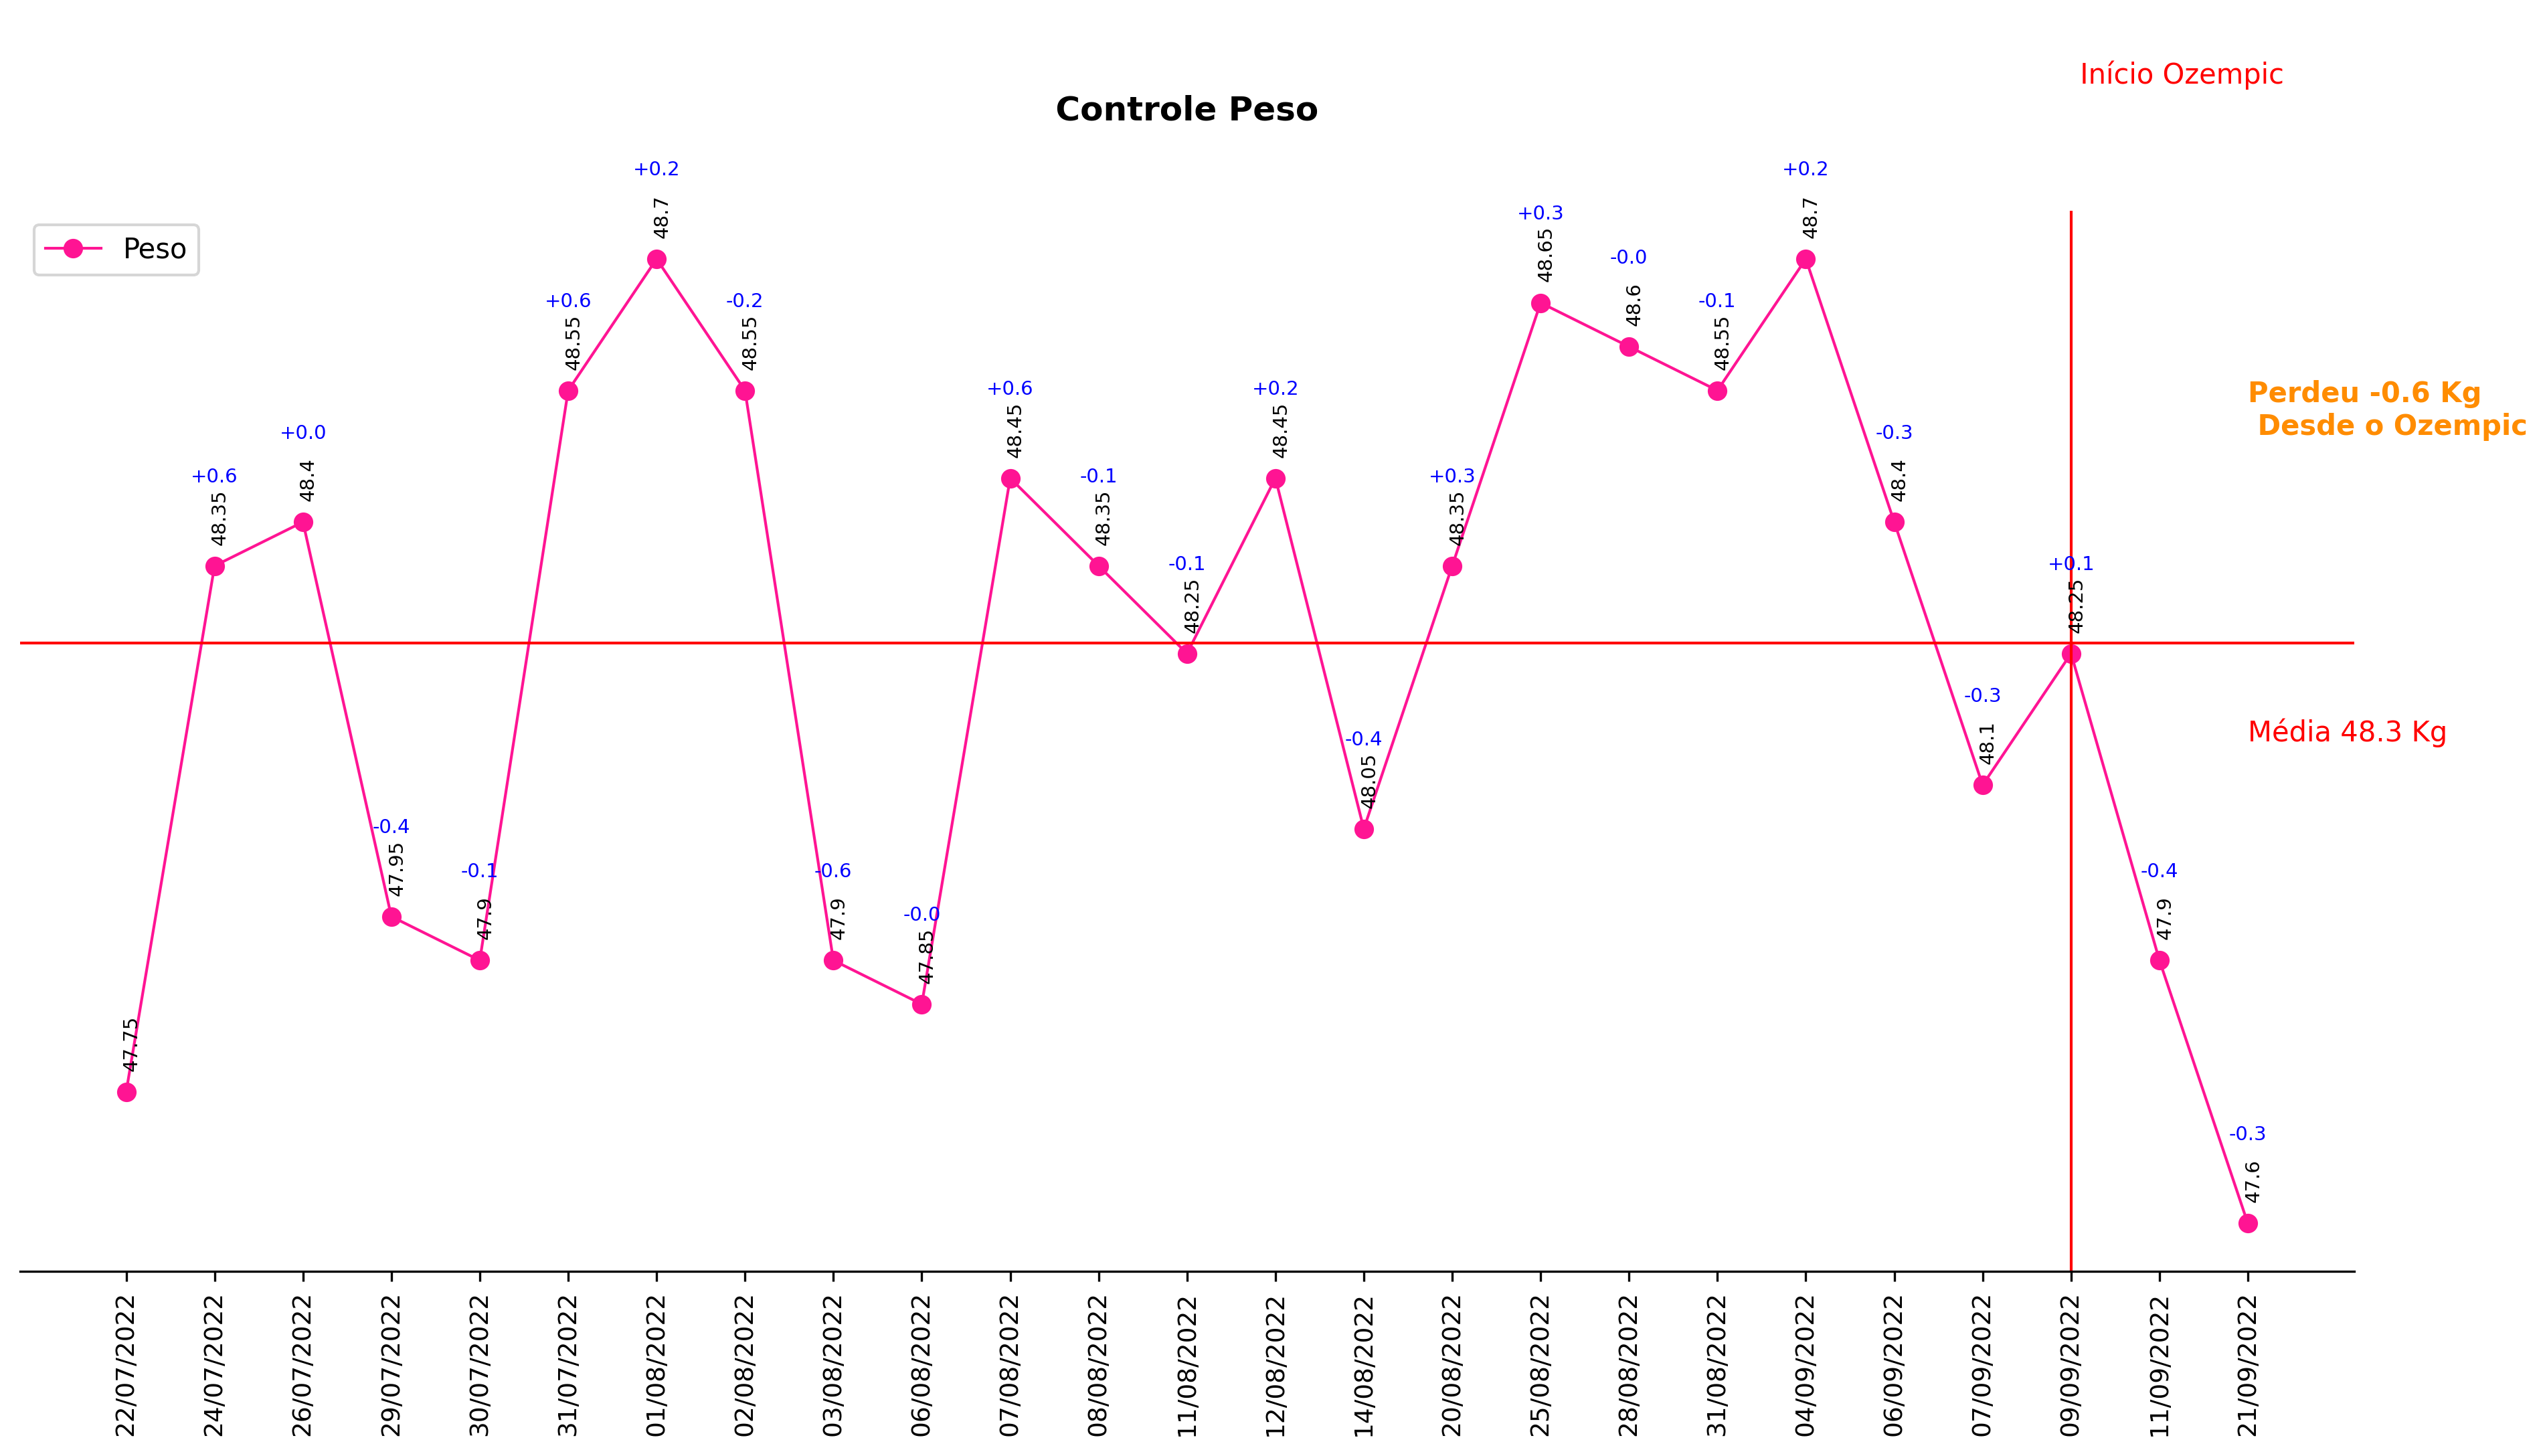

In [67]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

df = gc.open("PESO MARIDA")
df = df.sheet1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(df.get_all_records())


fig, ax = plt.subplots(dpi=300, figsize=(15,7))

ax.set_title("\n \n Controle Peso \n \n", fontweight='bold')

ax.plot(df["DATA"], df["PESO"], 
       color="#FF1493", # Cor da linha
       marker="o", # marcação dos pontos
       linewidth= 1, # espessura da linha
       label= "Peso" )   # legenda)



for i in range(0, len(list(df["DATA"]))):
    ax.annotate(df["PESO"][i], (df["DATA"][i], df["PESO"][i]),
                    ha="center", 
                    xytext=(2,9), 
                    textcoords = "offset points", 
                    fontsize=7,
                    color = '#000000',
                    rotation=90)


soma = (df["PESO"].iloc[-1]) - (df["PESO"].iloc[22])


for i in range(1, len(list(df["DATA"]))):
    if (df["PESO"][i] - df["PESO"].iloc[i-1]) < 0:
        ax.annotate("{:,.1f}".format((df["PESO"][i] - df["PESO"].iloc[i-1])), 
                    (df["DATA"][i], df["PESO"][i]),
                    ha="center", 
                    xytext=(0,30), 
                    textcoords = "offset points", 
                    fontsize=7,
                    color = '#0000FF',
                    rotation=0)
    else: 
        ax.annotate("+{:,.1f}".format((df["PESO"][i] - df["PESO"].iloc[i-1])), 
                    (df["DATA"][i], df["PESO"][i]),
                    ha="center", 
                    xytext=(0,30), 
                    textcoords = "offset points", 
                    fontsize=7,
                    color = '#0000FF',
                    rotation=0)                   

    
plt.axvline(x=df["DATA"].iloc[22], ymin=0, ymax=df["PESO"].max()+2, color='#FF0000', linewidth= 1)    
plt.text(df["DATA"].iloc[22], df["PESO"].max()+0.2, " Início Ozempic", color='#FF0000')
plt.axhline(y=df["PESO"].mean(), color='#FF0000', linewidth= 1)  
plt.text(df["DATA"].iloc[-1], df["PESO"].iloc[0]+0.4, "Média {:,.1f} Kg".format(df["PESO"].mean()), color='#FF0000')

if soma < 0:
    plt.text(df["DATA"].iloc[-1], df["PESO"].max()-0.2, "Perdeu {:,.1f} Kg\n Desde o Ozempic".format(soma), color='#FF8C00', fontweight='bold')
else: 
    plt.text(df["DATA"].iloc[-1], df["PESO"].max()-0.2, "Ganhou + {:,.1f} Kg\n Desde o Ozempic".format(soma), color='#8B0000', fontweight='bold')

#ax.set_yticks([40,50])
ax.set_xticks(df["DATA"])  
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_visible(False)
plt.xticks(rotation=90)
ax.tick_params(axis='x',labelsize=9) 
ax.legend(loc="upper left")

plt.savefig("Peso Carol.jpg");